In [19]:
import numpy as np
class AdalineGD(object):
    def  __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors ** 2).sum()/2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return self.net_input(X)
    
    def predict(self,X):
        return np.where(self.activation(X) >= 0, 1, -1)

In [20]:
import pandas as pd
file = '/Users/lina/Documents/test.csv'
df= pd.read_csv(file,header=None)#第一行不是数据说明，而是真实数据
#df1.to_csv('test.csv',index=False,header=None)
#df.head(10)#显示前十行

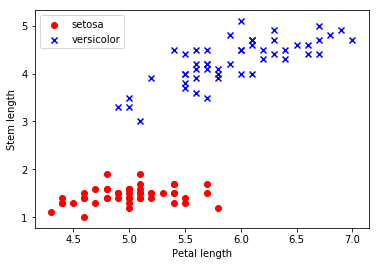

In [21]:
import matplotlib.pyplot as plt#数据可视化的工具
import numpy as np#提供一些列工具对数据进行加工和计算
y = df.loc[0:100, 4].values#抽取0-100行，第四列
y = np.where(y == 'Iris-setosa', -1, 1)
#print (y)
X = df.loc[0:100, [0, 2]].values#0-100行，第0列和第2列数据抽取
#print (X)
#下方画散点图,前50行抽出来，第0列当X坐标，第1列当Y坐标，用红色字体，用o表示，意思是label；后续是50-100行
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('Petal length')
plt.ylabel('Stem length')
plt.legend(loc='upper left')
##legend是显示图例，loc参数是位置,默认是显示在左上角的
plt.show()

In [22]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s','x','o','v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])#y里面有两种1，-1，所以选择以上两种颜色
    #获得花茎长度最大值最小值,-1为了扩大坐标轴范围，点更具中，画出图更好看
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max()
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max()
    
    #print(x1_min, x1_max)
    #print(x2_min, x2_max)
    #数据区域的填充，resolution是数据间隔
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    #print(np.arange(x1_min, x1_max, resolution).shape)
    #print(np.arange(x1_min, x1_max, resolution))
    #print(xx1.shape)
    #print(xx1)
    #print(np.arange(x2_min, x2_max, resolution).shape)
    #print(np.arange(x2_min, x2_max, resolution))
    #print(xx2.shape)
    #print(xx2)
    
    #Z来填充模型结果,ravel把原来的二维数组还原为单个维度的向量,把模型放入进行预测
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    #输入3.3 0--->-1;6.98 5.08--->1         T是转制
    print(xx1.ravel())
    print(xx2.ravel())
    print(Z)
    
    Z = Z.reshape(xx1.shape)#单维向量，变成xx1维度
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)#根据数据绘制分界线
    plt.xlim(xx1.min(),xx1.max())#坐标上下线分别是最大最小值
    plt.ylim(xx2.min(),xx2.max())
    #对两组数据打标签说明
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0], y=X[y==cl,1], alpha=1, c=cmap(idx),
                   marker=markers[idx], label=cl)
    

[ 3.3   3.32  3.34 ...,  6.94  6.96  6.98]
[ 0.    0.    0.   ...,  5.98  5.98  5.98]
[-1 -1 -1 ...,  1  1  1]


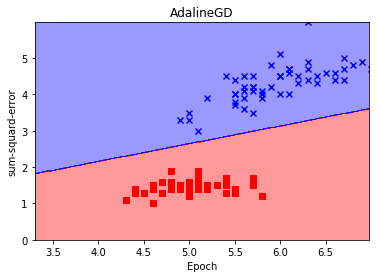

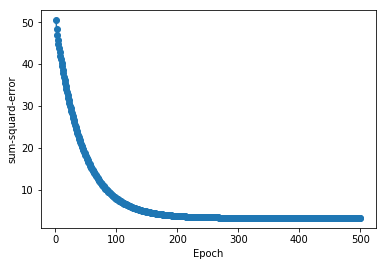

In [26]:
ada = AdalineGD(eta=0.0001, n_iter=500)
ada.fit(X, y)
plot_decision_regions(X, y, classifier=ada, resolution=0.02)
plt.title('AdalineGD')
plt.xlabel('Epoch')
plt.ylabel('sum-squard-error')
plt.show()

plt.plot(range(1, len(ada.cost_)+1),ada.cost_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('sum-squard-error')
plt.show()